In [1]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import numpy as np

In [2]:
DpM_Raw_data=pd.read_csv("Resources/DpM_Data/API_SP.DYN.CDRT.IN_DS2_es_csv_v2_1562579.csv",delimiter=",")

In [3]:
DpM_Raw_data=DpM_Raw_data.set_index("Country Name")

In [4]:
DpM_Mundo=DpM_Raw_data.loc["Mundo"]
#DpM_Mundo_df=DpM_Mundo[["Country Code","1960","1961","1962","1963","1964","1965","1966","1967","1968","1969","1970","1971","1972","1973","1974","1975","1976","1977","1978","1979","1980","1981","1982","1983","1984","1985","1986","1987","1988","1989","1990","1991","1992","1993","1994","1995","1996","1997","1998","1999","2000","2001","2002","2003","2004","2005","2006","2007","2008","2009","2010","2011","2012","2013","2014","2015","2016","2017","2018"]]

In [5]:
DpM_Mundo_df=pd.DataFrame(DpM_Mundo[3:62]).reset_index()

In [6]:
DpM_Mundo_df.shape

(59, 2)

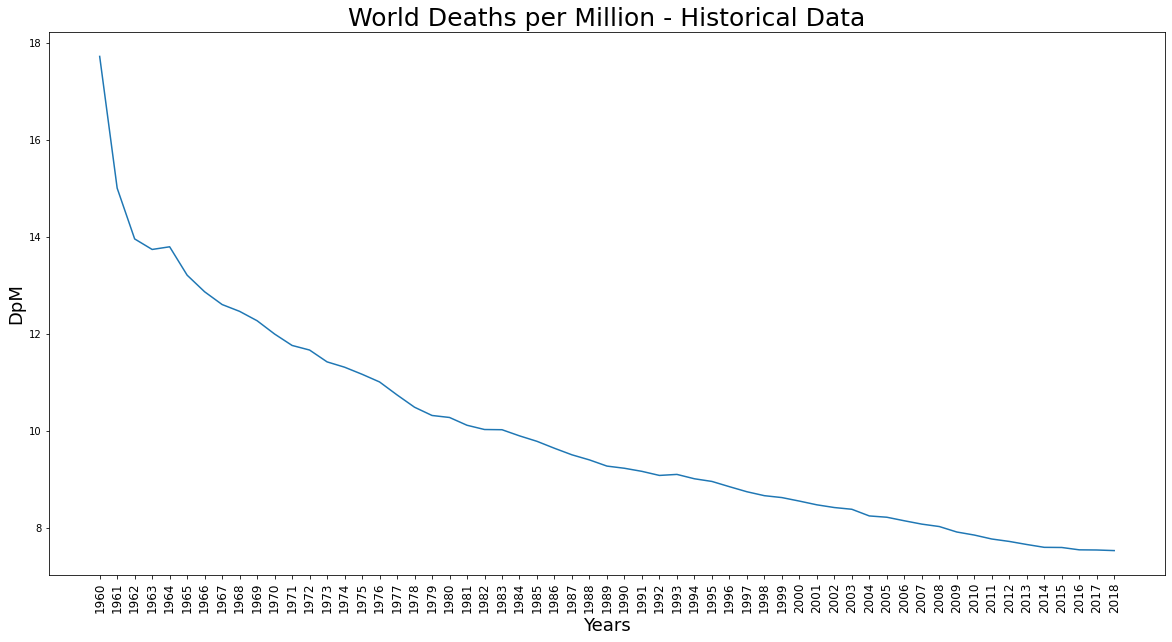

In [7]:
plt.figure(figsize=(20,10))
plt.plot(DpM_Mundo_df["index"],DpM_Mundo_df["Mundo"])
plt.title("World Deaths per Million - Historical Data",fontsize=25)
plt.xlabel("Years",fontsize=18)
plt.ylabel("DpM",fontsize=18)
plt.xticks(rotation="vertical",fontsize=12)
plt.show()

In [8]:
def linear_regression(x,y,title,x_label,y_label):
    from scipy.stats import linregress
    (slope,intercept,rvalue,pvalue,stderr)=linregress(x,y)
    regress_values=x*slope+intercept
    line_eq=f"y = x * {str(round(slope,2))} + {str(round(intercept,2))}" 
    plt.figure(figsize=(20,10))
    plt.scatter(x,y)
    plt.plot(x,regress_values,"r-")
    plt.annotate(line_eq,xycoords="axes points",xy=(10,10),fontsize=18,color="red")
    print(f"The r-squared is: {rvalue**2}")
    plt.title(title,fontsize=25)
    plt.xlabel(x_label,fontsize=18)
    plt.ylabel(y_label,fontsize=18)
    plt.xticks(x,rotation="vertical",fontsize=12)
    plt.show()
    return slope,intercept

In [9]:
DpM_Mundo_df.dtypes

index    object
Mundo    object
dtype: object

In [10]:
DpM_Mundo_df["index"]=DpM_Mundo_df["index"].astype(float)
DpM_Mundo_df["Mundo"]=DpM_Mundo_df["Mundo"].astype(float)

In [11]:
DpM_Mundo_new=DpM_Mundo_df.loc[DpM_Mundo_df["index"]>=1980]

The r-squared is: 0.9875580798440812


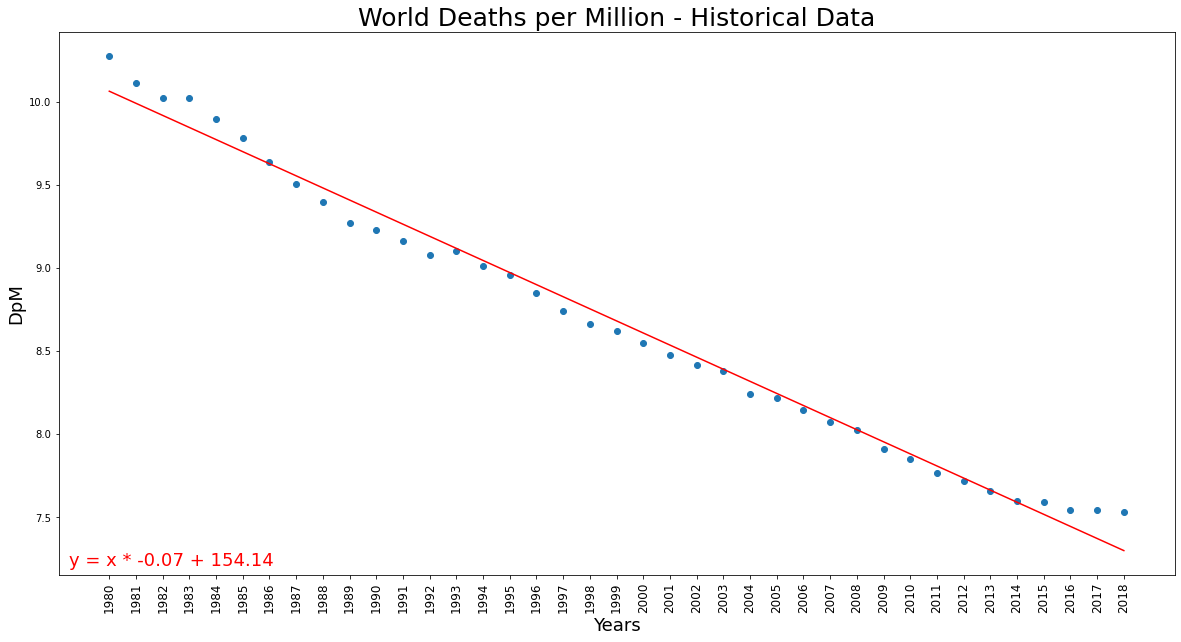

In [12]:
m,b=linear_regression(DpM_Mundo_new["index"],DpM_Mundo_new["Mundo"],"World Deaths per Million - Historical Data","Years","DpM")

In [13]:
DpM_2019=2018*(m)+b
DpM_2020=2020*(m)+b
print(f"The expected Deaths per Million Habitants in the World for 2019 is {str(round(DpM_2019,2))} and for 2020 is {str(round(DpM_2020,2))}")

The expected Deaths per Million Habitants in the World for 2019 is 7.3 and for 2020 is 7.15


In [14]:
DpM_2021=2021*(m)+b
DpM_2021

7.079542094807238

In [15]:
DpM_Mundo_df.columns=["Año","DpM"]


In [16]:
dataJF = "Resources/datos.csv"
dataJF = pd.read_csv(dataJF)

In [17]:
datos_df =pd.DataFrame(dataJF)

In [18]:
total_df=pd.merge(datos_df,DpM_Mundo_df,on="Año",how="left")
total_df=total_df.fillna(0)
total_df.head()

,Año,Population,GDPcons,GDPConsPPP,PC_GDPcons,PC_GDPConsPPP,Growth,FOOD,LIvestock,FOOD_PC,livestock_PC,DpM
0,1980,4458002944,11162,13348,2504,2994,2.08,1832600,612473,411,137,10.272459
1,1981,4536996864,11442,14858,2522,3275,1.88,1894980,626403,418,138,10.112151
2,1982,4617387008,11234,15808,2433,3424,0.48,1981357,640314,429,139,10.024429
3,1983,4699569152,11531,16833,2454,3582,2.71,2016019,658986,429,140,10.020062
4,1984,4784011776,11941,18200,2496,3804,4.53,2127095,687554,445,144,9.893736


In [19]:
total_df

,Año,Population,GDPcons,GDPConsPPP,PC_GDPcons,PC_GDPConsPPP,Growth,FOOD,LIvestock,FOOD_PC,livestock_PC,DpM
0,1980,4458002944,11162,13348,2504,2994,2.08,1832600,612473,411,137,10.272459
1,1981,4536996864,11442,14858,2522,3275,1.88,1894980,626403,418,138,10.112151
2,1982,4617387008,11234,15808,2433,3424,0.48,1981357,640314,429,139,10.024429
3,1983,4699569152,11531,16833,2454,3582,2.71,2016019,658986,429,140,10.020062
4,1984,4784011776,11941,18200,2496,3804,4.53,2127095,687554,445,144,9.893736
5,1985,4870922240,12471,19435,2560,3990,3.58,2168571,711442,445,146,9.780968
6,1986,4960567808,14698,20522,2963,4137,3.67,2212023,733122,446,148,9.637619
7,1987,5052521984,16921,21835,3349,4322,3.92,2253224,751677,446,149,9.502689
8,1988,5145425920,19031,23622,3699,4591,4.65,2276835,779388,442,151,9.397761
9,1989,5237441024,20019,25448,3822,4859,3.79,2353202,794771,449,152,9.270596


In [20]:
total_df.dtypes

Año                int64
Population         int64
GDPcons            int64
GDPConsPPP         int64
PC_GDPcons         int64
PC_GDPConsPPP      int64
Growth           float64
FOOD               int64
LIvestock          int64
FOOD_PC            int64
livestock_PC       int64
DpM              float64
dtype: object

In [21]:
total_dftot=total_df.loc[total_df["Año"]<=2018]

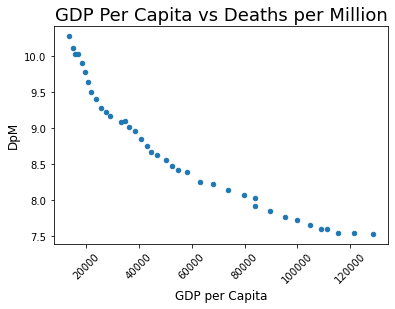

In [22]:
total_dftot.plot(kind="scatter",x="GDPConsPPP",y="DpM")
plt.title("GDP Per Capita vs Deaths per Million",fontsize=18)
plt.xlabel("GDP per Capita",fontsize=12)
plt.ylabel("DpM",fontsize=12)
plt.xticks(rotation=45,fontsize=10)
plt.show()

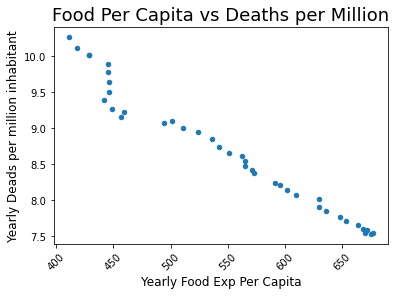

In [23]:
total_dftot.plot(kind="scatter",x="FOOD_PC",y="DpM")
plt.title("Food Per Capita vs Deaths per Million",fontsize=18)
plt.xlabel("Yearly Food Exp Per Capita",fontsize=12)
plt.ylabel("Yearly Deads per million inhabitant",fontsize=12)
plt.xticks(rotation=45,fontsize=10)
plt.show()

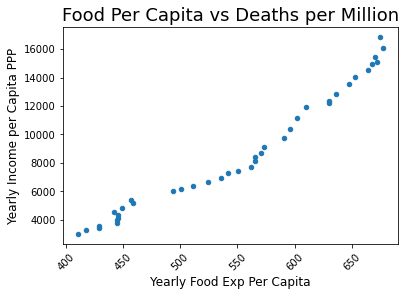

In [24]:
total_dftot.plot(kind="scatter",x="FOOD_PC",y="PC_GDPConsPPP")
plt.title("Food Per Capita vs Deaths per Million",fontsize=18)
plt.xlabel("Yearly Food Exp Per Capita",fontsize=12)
plt.ylabel("Yearly Income per Capita PPP",fontsize=12)
plt.xticks(rotation=45,fontsize=10)
plt.show()

In [24]:
# tareas
#encontrar via API la proyeccion de poblacion para 2020, 2021 y 2022

In [26]:
total_df_ADJ=total_df.loc[(total_df["Año"]>=1996)&(total_df["Año"]<=2018)]

The r-squared is: 0.9903534744479427


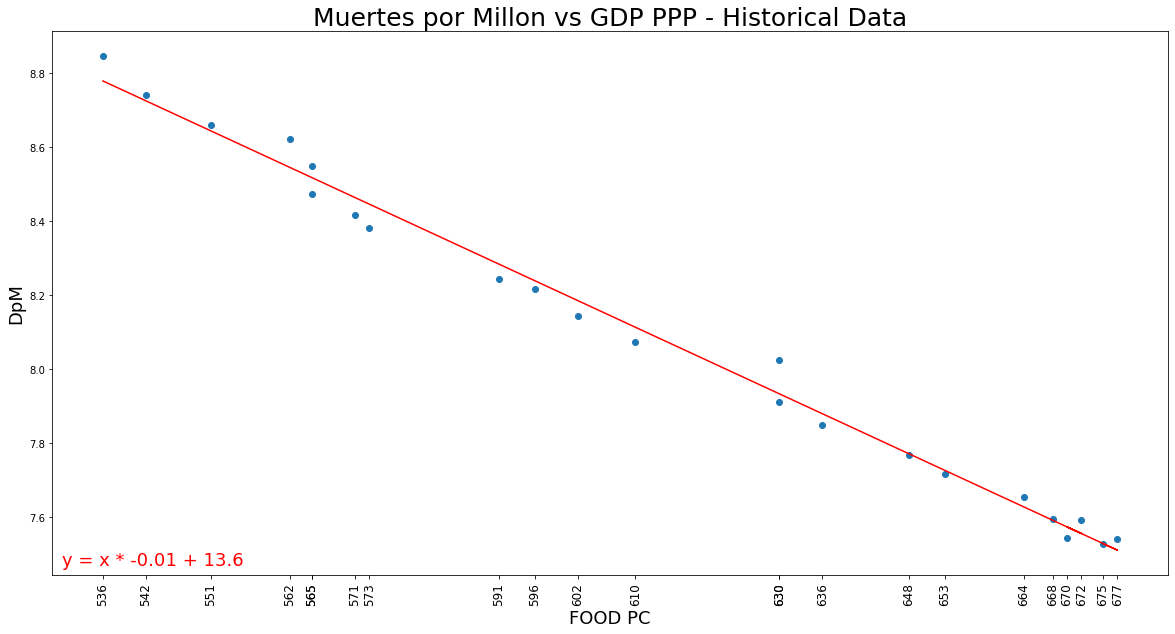

In [28]:
s,a=linear_regression(total_df_ADJ["FOOD_PC"],total_df_ADJ["DpM"],"Muertes por Millon vs GDP PPP - Historical Data","FOOD PC","DpM")

In [29]:
total_df_2020=total_df[total_df["Año"]==2020]
GDPconsPPP2020=total_df_2020["FOOD_PC"]

In [30]:
total_df_2021=total_df[total_df["Año"]==2021]
GDPconsPPP2021=total_df_2021["FOOD_PC"]

In [31]:
total_df_2022=total_df[total_df["Año"]==2022]
GDPconsPPP2022=total_df_2022["FOOD_PC"]

In [32]:
GDPconsPPP2020

40    0
Name: FOOD_PC, dtype: int64

In [71]:
DpM_GDP_2020=GDPconsPPP2020*(s)+a
DpM_GDP_2021=GDPconsPPP2021*(s)+a
DpM_GDP_2022=GDPconsPPP2022*s+a
print(DpM_GDP_2020)
print(DpM_GDP_2021)
print(DpM_GDP_2022)
#print(f"The expected Deaths per Million Habitants in the World for 2019 is {str(round(DpM_2019,2))} and for 2020 is {str(round(DpM_2020,2))}")

40    7.307578
Name: GDPConsPPP, dtype: float64
41    7.159862
Name: GDPConsPPP, dtype: float64
42    7.031353
Name: GDPConsPPP, dtype: float64
